# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Farah Putri Firdausa]
- **Email:** [farahpfrdus@gmail.com]
- **ID Dicoding:** [farahputri]

## Menentukan Pertanyaan Bisnis

Berikut adalah dua pertanyaan bisnis yang akan dijawab melalui proses analisis data ini:
- Bagaimana tren penggunaan sepeda berdasarkan musim dan bulan selama dua tahun terakhir?
- Apakah terdapat perbedaan signifikan dalam jumlah peminjaman sepeda antara hari kerja dan hari libur/akhir pekan?
- Bagaimana pengaruh cuaca terhadap jumlah sepeda yang dipinjam?

Kedua pertanyaan ini akan dianalisis untuk membantu memahami faktor-faktor yang memengaruhi permintaan layanan peminjaman sepeda.


## Import Semua Packages/Library yang Digunakan

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [17]:
df_day = pd.read_csv('day.csv')

**Insight:**
Insight:
- Dataset berhasil dimuat dari file lokal `day.csv`.
- Dataset berisi data peminjaman sepeda harian yang mencakup informasi tanggal, musim, cuaca, jumlah penyewa, dan kondisi lingkungan.


### Assessing Data

In [18]:
# Melihat dimensi dataset
print("Jumlah baris dan kolom:", df_day.shape)

# Informasi detail tiap kolom
df_day.info()

# Statistik deskriptif awal
df_day.describe()

# Cek missing values
print("\nMissing values per kolom:\n", df_day.isnull().sum())

# Cek duplikat
print("Jumlah data duplikat:", df_day.duplicated().sum())

# Cek nilai unik kolom kategorikal
print("\nUnique values:")
print("season:", df_day['season'].unique())
print("weekday:", df_day['weekday'].unique())
print("mnth:", df_day['mnth'].unique())
print("weathersit:", df_day['weathersit'].unique())

Jumlah baris dan kolom: (731, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Missing values per kolom:
 instant       0
dteday        0

**Insight:**
- Tidak ditemukan nilai null atau data duplikat pada dataset.
- Beberapa kolom kategorikal masih dalam bentuk numerik dan perlu diubah ke label deskriptif agar mudah dipahami.


### Cleaning Data

In [19]:
# Salin data asli
df_day_clean = df_day.copy()

# Hapus kolom yang tidak relevan
df_day_clean.drop(columns=['instant', 'atemp'], inplace=True)

# Konversi kolom tanggal ke format datetime
df_day_clean['dteday'] = pd.to_datetime(df_day_clean['dteday'])

# Mapping nilai kategorikal ke label deskriptif
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
               4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
weather_map = {
    1: 'Clear or Partly Cloudy',
    2: 'Mist or Cloudy',
    3: 'Light Snow or Rain',
    4: 'Heavy Rain or Fog'
}

df_day_clean['season'] = df_day_clean['season'].map(season_map)
df_day_clean['weekday'] = df_day_clean['weekday'].map(weekday_map)
df_day_clean['mnth'] = df_day_clean['mnth'].map(month_map)
df_day_clean['weathersit'] = df_day_clean['weathersit'].map(weather_map)

# Tampilkan hasil
df_day_clean.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,0,Saturday,0,Mist or Cloudy,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sunday,0,Mist or Cloudy,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,0,Monday,1,Clear or Partly Cloudy,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tuesday,1,Clear or Partly Cloudy,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wednesday,1,Clear or Partly Cloudy,0.226957,0.436957,0.186900,82,1518,1600


**Insight:**
- Data telah dibersihkan dengan menghapus kolom `instant` dan `atemp` yang tidak relevan.
- Nilai kategorikal seperti `season`, `mnth`, `weekday`, dan `weathersit` telah diubah menjadi label yang lebih mudah dipahami.


## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
# Ukuran default plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

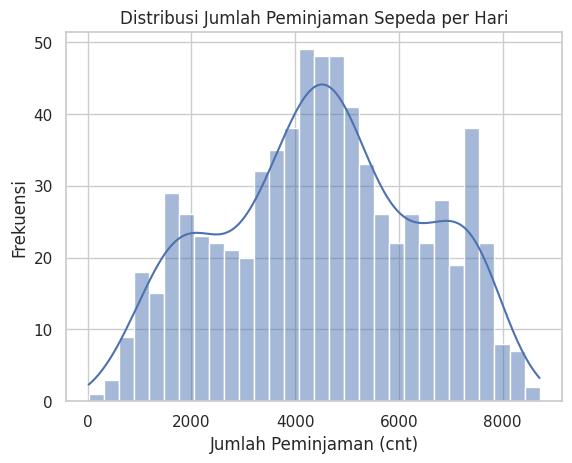

In [21]:
# Distribusi jumlah peminjaman sepeda (cnt)
sns.histplot(df_day_clean['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda per Hari')
plt.xlabel('Jumlah Peminjaman (cnt)')
plt.ylabel('Frekuensi')
plt.show()

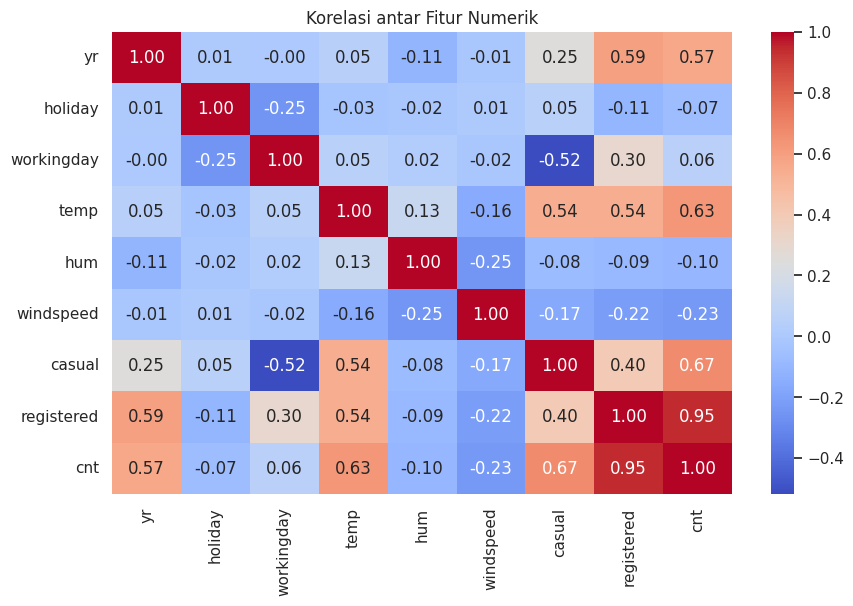

In [22]:
# Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df_day_clean.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar Fitur Numerik")
plt.show()

**Insight:**

- Sebaran jumlah peminjaman sepeda per hari membentuk distribusi normal yang condong ke tengah, dengan mayoritas hari memiliki peminjaman sekitar 4000–5000 sepeda.
- Korelasi tertinggi terhadap jumlah peminjaman (`cnt`) berasal dari jumlah pengguna terdaftar (`registered`) dengan nilai korelasi sebesar 0.95.
- Faktor lingkungan seperti suhu (`temp`) juga memiliki korelasi cukup kuat (0.63) terhadap jumlah peminjaman, sementara kelembaban dan kecepatan angin tidak terlalu berpengaruh.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan musim dan bulan selama dua tahun terakhir?

/tmp/ipython-input-23-971872715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df_day_clean, palette='pastel')


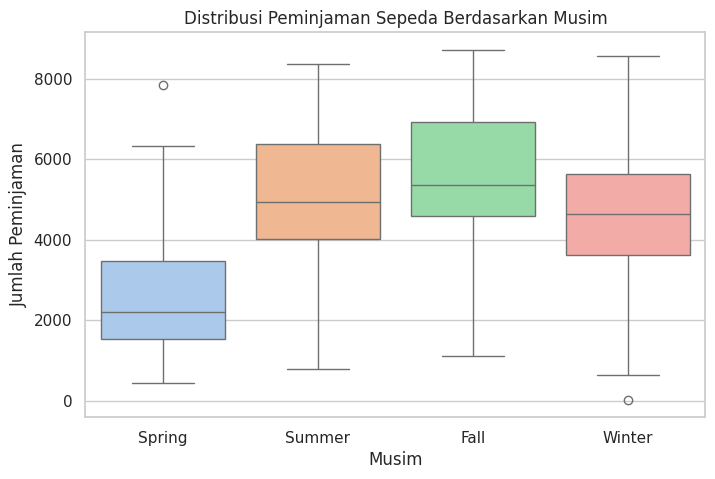

In [23]:
#Visualisasi peminjaman per musim
plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='cnt', data=df_day_clean, palette='pastel')
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()

/tmp/ipython-input-24-689964063.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=df_day_clean, order=order_m, estimator='mean', ci=None, palette='Set2')
/tmp/ipython-input-24-689964063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=df_day_clean, order=order_m, estimator='mean', ci=None, palette='Set2')


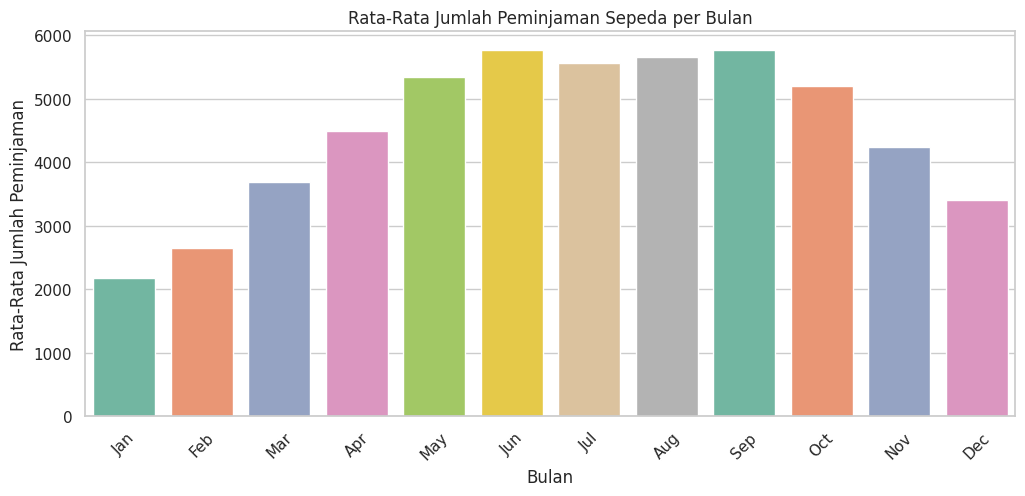

In [24]:
# Visualisasi peminjaman per bulan
plt.figure(figsize=(12,5))
order_m = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.barplot(x='mnth', y='cnt', data=df_day_clean, order=order_m, estimator='mean', ci=None, palette='Set2')
plt.title('Rata-Rata Jumlah Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Penggunaan sepeda tertinggi terjadi pada musim **Fall** dan **Summer**, menandakan bahwa kondisi cuaca hangat mendorong lebih banyak aktivitas bersepeda.
- Rata-rata jumlah peminjaman meningkat tajam dari bulan Januari ke September, dengan puncaknya pada **bulan September**.
- Penurunan drastis terlihat pada musim dingin (Desember–Februari), yang kemungkinan besar disebabkan oleh suhu dingin dan cuaca buruk.

### Pertanyaan 2: Apakah terdapat perbedaan signifikan dalam jumlah peminjaman sepeda antara hari kerja dan hari libur/akhir pekan?

/tmp/ipython-input-25-4007200401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=df_day_clean, palette='cool')


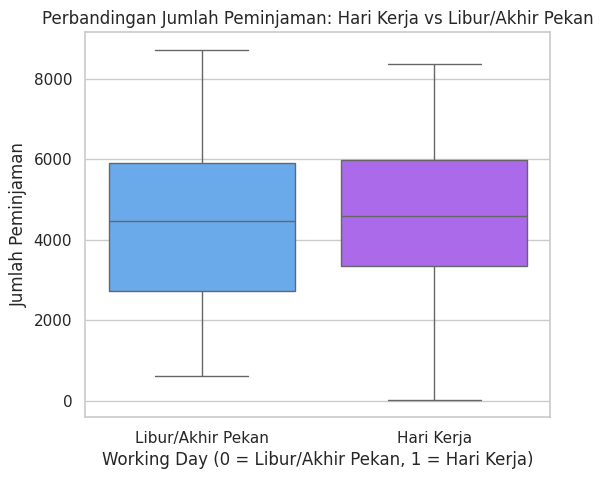

,cnt
workingday,
0,4330.168831
1,4584.820000


In [25]:
# Visualisasi perbandingan peminjaman hari kerja vs akhir pekan/libur
plt.figure(figsize=(6,5))
sns.boxplot(x='workingday', y='cnt', data=df_day_clean, palette='cool')
plt.title('Perbandingan Jumlah Peminjaman: Hari Kerja vs Libur/Akhir Pekan')
plt.xlabel('Working Day (0 = Libur/Akhir Pekan, 1 = Hari Kerja)')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1], ['Libur/Akhir Pekan', 'Hari Kerja'])
plt.show()

# Rata-rata peminjaman berdasarkan workingday
df_day_clean.groupby('workingday')['cnt'].mean()

**Insight:**
- Rata-rata jumlah peminjaman sepeda pada **hari kerja (4585)** sedikit lebih tinggi dibandingkan dengan **hari libur/akhir pekan (4330)**.
- Hal ini mengindikasikan bahwa sepeda digunakan secara aktif sebagai moda transportasi pada hari kerja, terutama oleh pengguna terdaftar.
- Namun, penyebaran peminjaman pada akhir pekan lebih luas dan bervariasi, yang mungkin mencerminkan pola penggunaan rekreasi atau kegiatan santai.

### Pertanyaan 3 : Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

/tmp/ipython-input-26-2715296919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=df_day_clean, order=weather_order, palette='coolwarm')


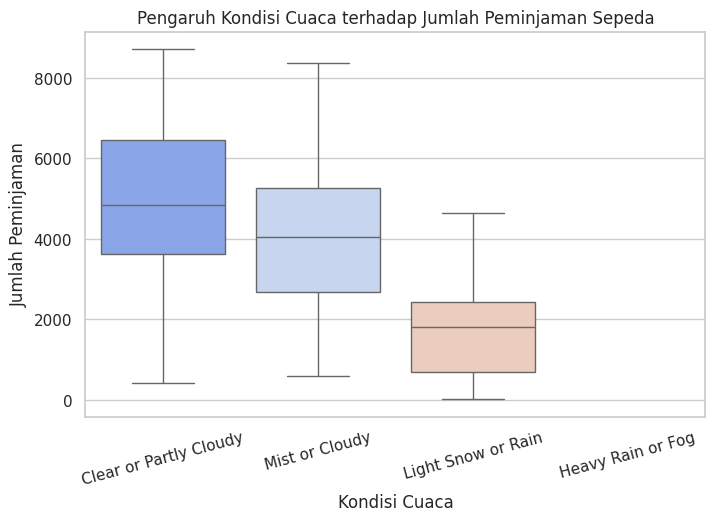

,cnt
weathersit,
Clear or Partly Cloudy,4876.786177
Mist or Cloudy,4035.862348
Light Snow or Rain,1803.285714
Heavy Rain or Fog,NaN


In [26]:
# Urutan kategori cuaca
weather_order = ['Clear or Partly Cloudy', 'Mist or Cloudy', 'Light Snow or Rain', 'Heavy Rain or Fog']

# Visualisasi pengaruh cuaca terhadap jumlah peminjaman
plt.figure(figsize=(8, 5))
sns.boxplot(x='weathersit', y='cnt', data=df_day_clean, order=weather_order, palette='coolwarm')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=15)
plt.show()

# Rata-rata jumlah peminjaman per kondisi cuaca
df_day_clean.groupby('weathersit')['cnt'].mean().reindex(weather_order)


**Insight:**
- Jumlah peminjaman sepeda tertinggi terjadi saat cuaca **cerah atau berawan sebagian**, dengan rata-rata hampir **4.900 peminjaman per hari**.
- Peminjaman menurun saat cuaca **berkabut/mendung**, dan menurun tajam saat **salju ringan atau hujan ringan**, di mana rata-rata hanya sekitar **1.800 peminjaman per hari**.
- Tidak terdapat data untuk cuaca ekstrem (*Heavy Rain or Fog*), kemungkinan karena hari-hari tersebut tidak tersedia atau sepeda tidak beroperasi.
- Hasil ini menunjukkan bahwa cuaca memiliki pengaruh signifikan terhadap perilaku pengguna dalam menggunakan layanan sepeda.

## Analisis Lanjutan : Segmentasi Pengguna (Casual vs Registered)

Tujuan :
Menganalisis perbedaan pola peminjaman antara pengguna terdaftar (registered) dan tidak terdaftar (casual) untuk memberikan insight terhadap strategi layanan atau promosi

/tmp/ipython-input-27-1301566641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_day_clean[['casual', 'registered']].sum().reset_index(),


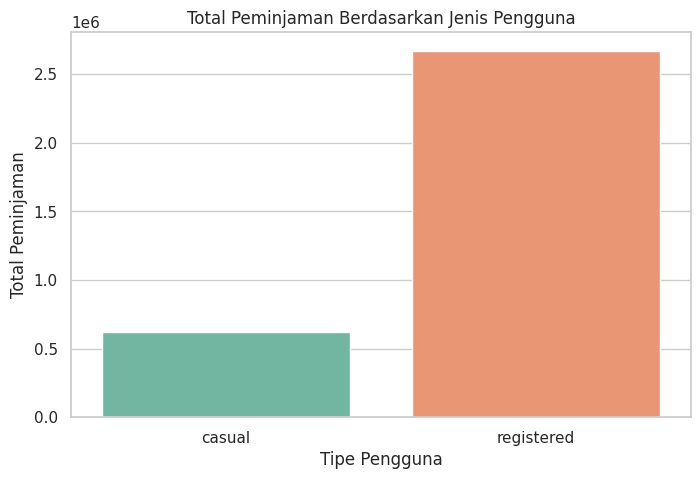

In [27]:
# Membandingkan total peminjaman
plt.figure(figsize=(8, 5))
sns.barplot(data=df_day_clean[['casual', 'registered']].sum().reset_index(),
            x='index', y=0, palette='Set2')
plt.title('Total Peminjaman Berdasarkan Jenis Pengguna')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Total Peminjaman')
plt.show()

<Figure size 1200x600 with 0 Axes>

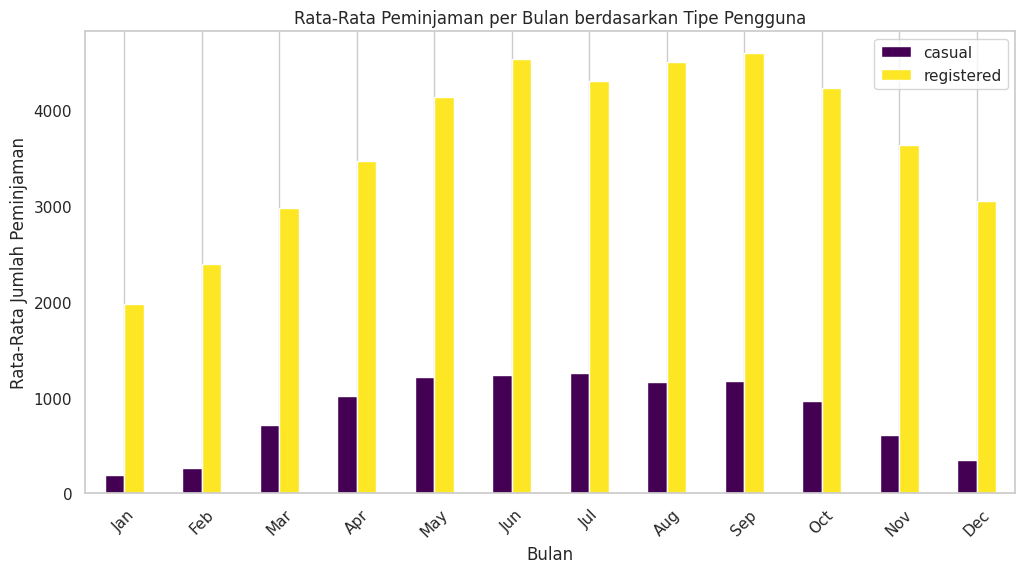

In [28]:
# Tren bulanan per jenis pengguna
plt.figure(figsize=(12, 6))
df_month_user = df_day_clean.groupby('mnth')[['casual', 'registered']].mean().reindex(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

df_month_user.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='viridis')
plt.title('Rata-Rata Peminjaman per Bulan berdasarkan Tipe Pengguna')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insight:**
- Jumlah peminjaman sepeda oleh **pengguna terdaftar (registered)** mencapai lebih dari 2,6 juta, jauh lebih tinggi dibandingkan **pengguna kasual (casual)** yang hanya sekitar 600 ribu.
- Pengguna **registered** memiliki pola peminjaman yang konsisten sepanjang tahun, dengan rata-rata bulanan di atas 4.000 peminjaman.
- Sebaliknya, pengguna **casual** menunjukkan peningkatan signifikan pada musim panas (Mei–Agustus), menandakan bahwa peminjaman dari segmen ini lebih bersifat musiman dan kemungkinan digunakan untuk kegiatan rekreasi.
- Segmentasi ini dapat digunakan untuk menyusun strategi promosi atau pengembangan layanan berdasarkan tipe dan perilaku pengguna.


## Conclusion

- **Conclusion Pertanyaan 1:** Tren penggunaan sepeda meningkat secara signifikan pada musim panas dan gugur, dengan puncak peminjaman terjadi pada bulan September. Ini menunjukkan bahwa kondisi cuaca hangat sangat mendukung aktivitas bersepeda.

- **Conclusion Pertanyaan 2:** Terdapat perbedaan pola penggunaan antara hari kerja dan akhir pekan/libur. Jumlah peminjaman sedikit lebih tinggi pada hari kerja, kemungkinan besar karena digunakan sebagai alat transportasi oleh pengguna terdaftar.

- **Conclusion Pertanyaan 3 :** Jumlah peminjaman sangat dipengaruhi oleh kondisi cuaca. Semakin buruk cuaca (hujan, salju, atau kabut tebal), semakin rendah tingkat peminjaman sepeda. Hal ini penting untuk perencanaan operasional dan promosi musiman.

In [29]:
# Simpan dataset yang sudah dibersihkan
df_day_clean.to_csv("main_data.csv", index=False)